In [1]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def get_prediction(x,theta):
    return ?? # (definition of linear regression) return predicted y given the inputs and coefficients 

def gradientDescent(X,y,theta,alpha=0.01,num_iters=500):
    m=len(y)
    
    for i in range(num_iters):
        predictions = get_prediction(X,theta)
        errors = ?? # hint: just subtract...
        grad_theta = ?? # calculate the gradient using error. careful about dimension mismatch.
        theta_update_value = ?? # multiply alpha and 1/m with grad_theta to create the final update values
        theta -= ??  # finally, update the coefficients
    
    return theta

def get_perf_metrics(predicted, actual):
    mean_abs_error = ?? # use np.abs and np.mean
    mean_square_error = ?? # remember scalar operations on numpy arrays work elementwise (called "broadcasting"). also, use np.mean()
    root_mean_sq_error = np.sqrt(mean_square_error)
    mean_val = actual.mean()
    r_squared = ?? # use mean_val. scalar operation broadcasting concept useful here as well
    
    return_dict = {'mae':mean_abs_error, 'r2':r_squared, 'mse':mean_square_error, 'rmse':root_mean_sq_error}
    
    return return_dict

In [3]:
# initialization
matplotlib.rcParams['figure.figsize'] = 15,8
n_features = 2
n_samples = 1000
datax, datay = make_regression(n_features=n_features, n_samples=n_samples, noise=31.22)
theta = np.zeros(n_features)

In [4]:
# estimate model with gradient descent
theta = ?? # call gradientDescent with appropriate arguments to estimate regression coefficients 
print (theta)

[41.1206764  79.14664284]


In [5]:
# predict the model performance with trained model
pred = get_prediction(datax, theta)
get_perf_metrics(pred, datay)

{'mae': 24.90236296502497,
 'r2': 0.8914794852641713,
 'mse': 975.3833786406396,
 'rmse': 31.231128360029512}

### now that we know it works,
create another dataset, apply train test split

In [6]:
#datax, datay = make_regression(n_features=n_features, n_samples=n_samples)
theta2 = np.zeros(n_features)

X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.25, random_state=42)

In [7]:
theta2 = ?? # call gradientDescent with appropriate arguments to estimate regression coefficients 
print (theta2)

[41.46583213 78.87629753]


In [8]:
y_pred = get_prediction(X_test, theta)
get_perf_metrics(y_pred, y_test)

{'mae': 24.270298695704938,
 'r2': 0.891327861990372,
 'mse': 956.0363604505502,
 'rmse': 30.919837652396403}

## visualizations

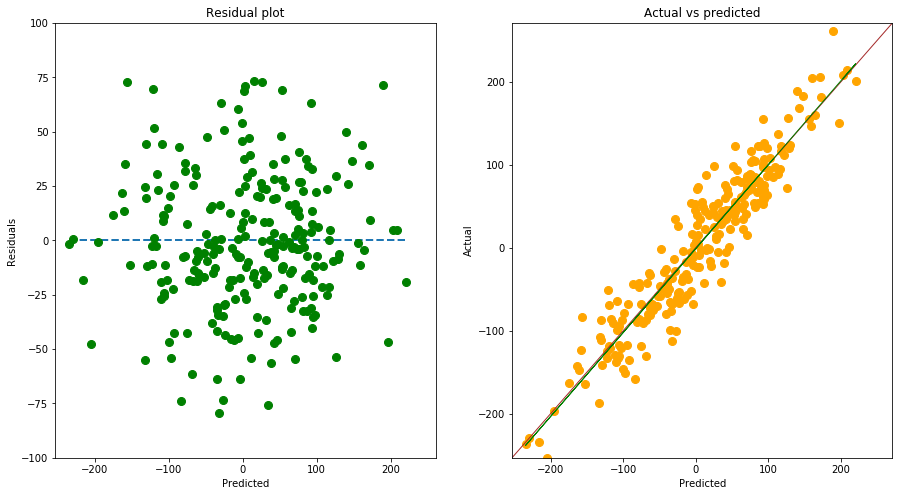

In [9]:
res = y_test - y_pred
fig = plt.figure()

# calculate limits of plots
max_true = np.max(y_test)
max_pred = np.max(y_pred)
min_true = np.min(y_test)
min_pred = np.min(y_pred)

# create two plots in one window
#fig.set_tight_layout({"pad": 3.5})
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# create residual vs predicted plot
ax1.plot([min_pred, max_pred], [0, 0], linestyle='--', lw=2)
ax1.plot(y_pred, res, color='green', marker='o', markersize=8, lw=0)
ax1.set_ylabel("Residuals")
ax1.set_xlabel("Predicted")
ax1.set_ylim([-100, 100])
ax1.set_xlim([min_true, max_true])

# create actual vs predicted plot
# plot the points
ax2.plot(y_pred, y_test, color='orange', marker='o', markersize=8, lw=0)
# plot the x=y line
ax2.plot([min_true, max_true+10], [min_true, max_true+10], linestyle = '-', lw=1, color = 'brown')
# plot the best fit line
m, b = np.polyfit(y_pred, y_test, 1)
ax2.plot(y_pred, m*y_pred+b, linestyle = '-', lw=1, color='green')
# set limits etc.
ax2.set_xlim([min_true, max_true+10])
ax2.set_ylim([min_true, max_true+10])
ax2.set_ylabel("Actual")
ax2.set_xlabel("Predicted")

ax1.set_title('Residual plot')
ax2.set_title('Actual vs predicted')
_ = 2



### Questions
- Comment on the effect of <code>n_iters</code> and <code>alpha</code> in the gradient descent algorithm.
- The r2 score of the model is approximately same when evaluated on entire dataset (training data), vs. on unseen data (test data). What can you infer from this observation? 
- Why are there two lines in the Actual vs predicted plot? What does the relative distance and angle between those lines imply about the goodness of model?
- What can you infer from the Residual plot?